## Import

In [68]:
#https://peopledoc.github.io/workalendar/basic.html
from datetime import date
from datetime import timedelta
from datetime import datetime
from calendar import monthrange
#from calendra.europe import Sweden
import pandas as pd 

data = pd.read_csv("input_3.csv",sep=';')
data = data.fillna(0)
data['date_'] = data.apply(lambda x: datetime.strptime(x['date'], '%Y-%m-%d'), axis=1)
data = data.set_index('date_')


In [125]:

def calc_salary(month_df,name):
	from calendar import monthrange
	from datetime import date
	from datetime import datetime
	# julia
	month = month_df.head(1).index.month[0]
	year = month_df.head(1).index.year[0]
	num_days_in_month = monthrange(year,month)[1]

	if (name == 'julia'):
		salary_monthly = 31800
		parent_kr_per_day = ((salary_monthly*12*0.8*0.97))/365
		work_bonus_kr_per_day = ((salary_monthly*12*0.2*0.5))/365
		vacation_bonus_kr_per_day = (salary_monthly*0.0043)
		## variables
		num_effective_vacation_days = sum(month_df['vacation_j']*month_df['workday'])
		num_vacation_days = sum(month_df['vacation_j'])
		all_parent_days_list = month_df[['work_bonus_day_j','parent_day_j']].max(axis=1)
		num_parent_days = all_parent_days_list.sum()
		num_effective_parent_days = sum(all_parent_days_list.multiply(month_df['multi_j']))
		num_work_bonus_days = sum(month_df['work_bonus_day_j'])
		num_non_working_days = sum((-month_df['work_j'])*month_df['workday'])

	elif (name == 'filip'):
		salary_monthly = 42000
		bb_10 = 46500*10
		salary_over_10bb_yearly = (salary_monthly*12)-bb_10
		salary_below_10bb_yearly = salary_monthly*12 - salary_over_10bb_yearly
		work_bonus_kr_per_day = ((salary_below_10bb_yearly*0.2)+ (salary_over_10bb_yearly))/365
		parent_kr_per_day = ((salary_below_10bb_yearly*0.8*0.97))/365
		vacation_bonus_kr_per_day = (salary_monthly*0.0043)
		## variables
		num_effective_vacation_days = sum(month_df['vacation_f']*month_df['workday'])
		num_vacation_days = sum(month_df['vacation_f'])
		num_10_days = sum(month_df['10d_f'])
		all_parent_days_list = month_df[['work_bonus_day_f','parent_day_f','10d_f']].max(axis=1)
		num_parent_days = all_parent_days_list.sum() - num_10_days
		num_effective_parent_days = sum(all_parent_days_list.multiply(month_df['multi_f']))
		num_work_bonus_days = sum(month_df['work_bonus_day_f'])
		num_non_working_days = sum(month_df['work_f'])

	#num_p_julia = sum(month_df['parent_day_j'])
	
	# decide removal of salary
	if (sum(all_parent_days_list)==num_days_in_month):
		remove_from_salary = salary_monthly
	else:
		remove_from_salary = ((salary_monthly*12)/365)*sum(all_parent_days_list)
	#decide money from FK
	salary_from_work = salary_monthly - remove_from_salary
	from_fk = parent_kr_per_day*num_effective_parent_days
	from_work_bonus = num_work_bonus_days*work_bonus_kr_per_day
	from_vacation_bonus = num_effective_vacation_days*vacation_bonus_kr_per_day
	total_salary = from_fk + from_work_bonus + salary_from_work + from_vacation_bonus
	output = {}
	output['from_work_bonus'] = from_work_bonus
	output['from_fk'] = from_fk
	output['salary_from_work'] = salary_from_work
	output['total_salary'] = total_salary
	output['month'] = date(year,month,1)
	output['num_effective_vacation_days'] = num_effective_vacation_days
	output['num_effective_parent_days'] = num_effective_parent_days
	output['num_vacation_days'] = num_vacation_days
	output['num_parent_days'] = num_parent_days
	output['num_work_bonus_days'] = num_work_bonus_days
	output['salary_from_work'] = salary_from_work
	output['num_days_off'] = num_vacation_days + num_parent_days
	output['name'] = name
	return output



In [126]:
salary_monthly = 48000
num_non_working_days = sum(1-month_df['work_f'])
((salary_monthly*12)/365)*num_non_working_days
sum((-month_df['work_j'])*month_df['workday'])

0

In [127]:
#i = date(2019,8,1)
#month_df = data[(data.index.year==i.year)&(data.index.month==i.month)]
#calc_salary(month_df,'julia')

In [128]:
def calc_all(filename):
    data = pd.read_csv(filename,sep=';')
    data = data.fillna(0)
    data['date_'] = data.apply(lambda x: datetime.strptime(x['date'], '%Y-%m-%d'), axis=1)
    data = data.set_index('date_')
    startyear = 2019
    startmonth = 5
    endyear = 2021
    endmonth = 1
    all_months = [date(m//12, m%12+1, 1) for m in range(startyear*12+startmonth-1, endyear*12+endmonth)]
    list_of_output = []
    for i in all_months:
        month_df = data[(data.index.year==i.year)&(data.index.month==i.month)]
        filip_output = calc_salary(month_df,'filip')
        julia_output = calc_salary(month_df,'julia')
        list_of_output.append(filip_output)
        list_of_output.append(julia_output)
    df = pd.DataFrame.from_dict(list_of_output)
    #df.to_csv('out.csv',index=False)
    return df


In [129]:
df1 = calc_all("input_1.csv")
df1 = df1.groupby(['month']).sum()
df1['version'] = 'version_1'

df2 = calc_all("input_2.csv")
df2 = df2.groupby(['month']).sum()
df2['version'] = 'version_2'

df3 = calc_all("input_3.csv")
df3 = df3.groupby(['month']).sum()
df3['version'] = 'version_3'

df_tmp = df1.append(df2)
df = df_tmp.append(df3)
df = df.reset_index()

In [130]:
#df1 = calc_all("input_1.csv")
#df1['version'] = 'version_1'
#df2 = calc_all("input_2.csv")
#df2['version'] = 'version_2'
#df3 = calc_all("input_3.csv")
#df3['version'] = 'version_3'
#df_tmp = df1.append(df2)
#df = df_tmp.append(df3)
#df.groupby(['month','name','version'])
#df = df.reset_index()

In [131]:
df.groupby(['version']).sum()[['from_fk','from_work_bonus','salary_from_work','total_salary','num_effective_parent_days','num_effective_vacation_days','num_days_off','num_parent_days','num_vacation_days','num_work_bonus_days']]

,from_fk,from_work_bonus,salary_from_work,total_salary,num_effective_parent_days,num_effective_vacation_days,num_days_off,num_parent_days,num_vacation_days,num_work_bonus_days
version,,,,,,,,,,
version_1,299819.612067,83914.520548,791962.191781,1.185271e+06,330.000000,62.0,728.0,615.0,113.0,360.0
version_2,325803.372223,79792.438356,778022.465753,1.194315e+06,358.000000,67.0,750.0,630.0,120.0,355.0
version_3,254641.469135,79792.438356,778022.465753,1.123153e+06,270.285714,67.0,750.0,630.0,120.0,355.0


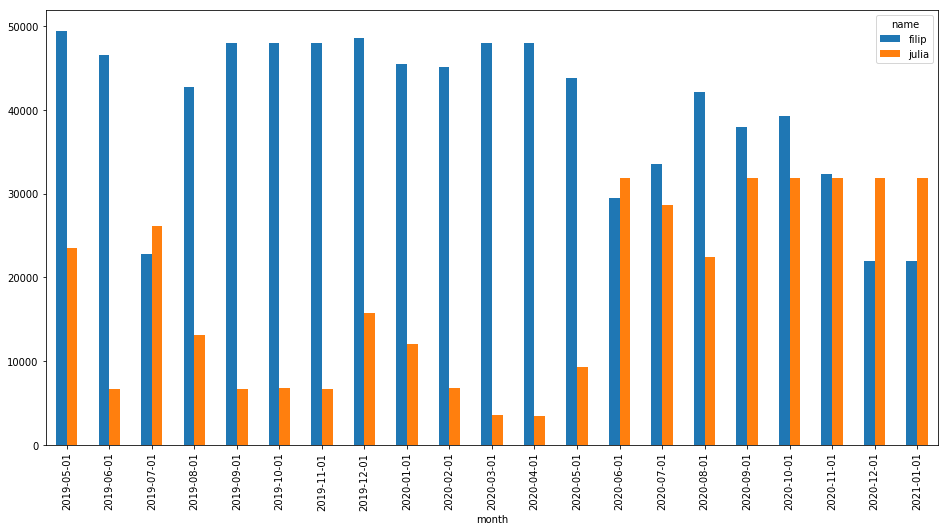

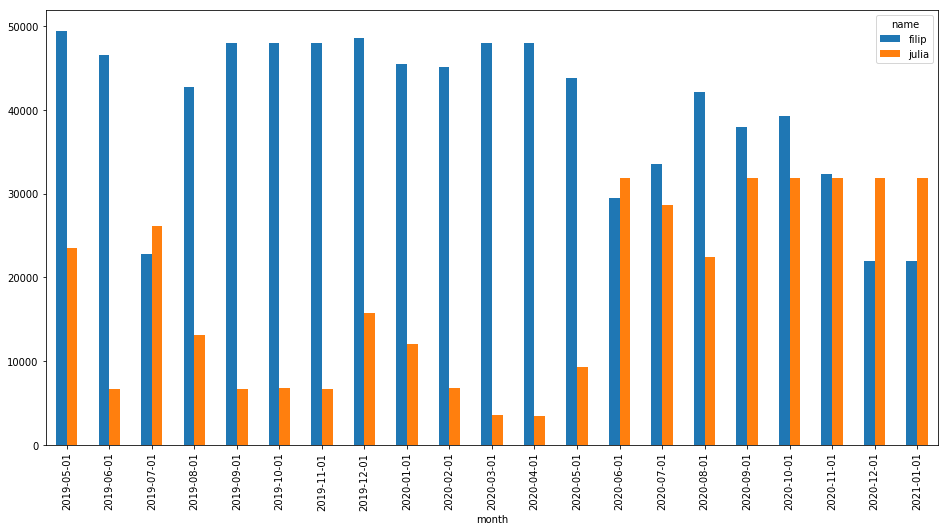

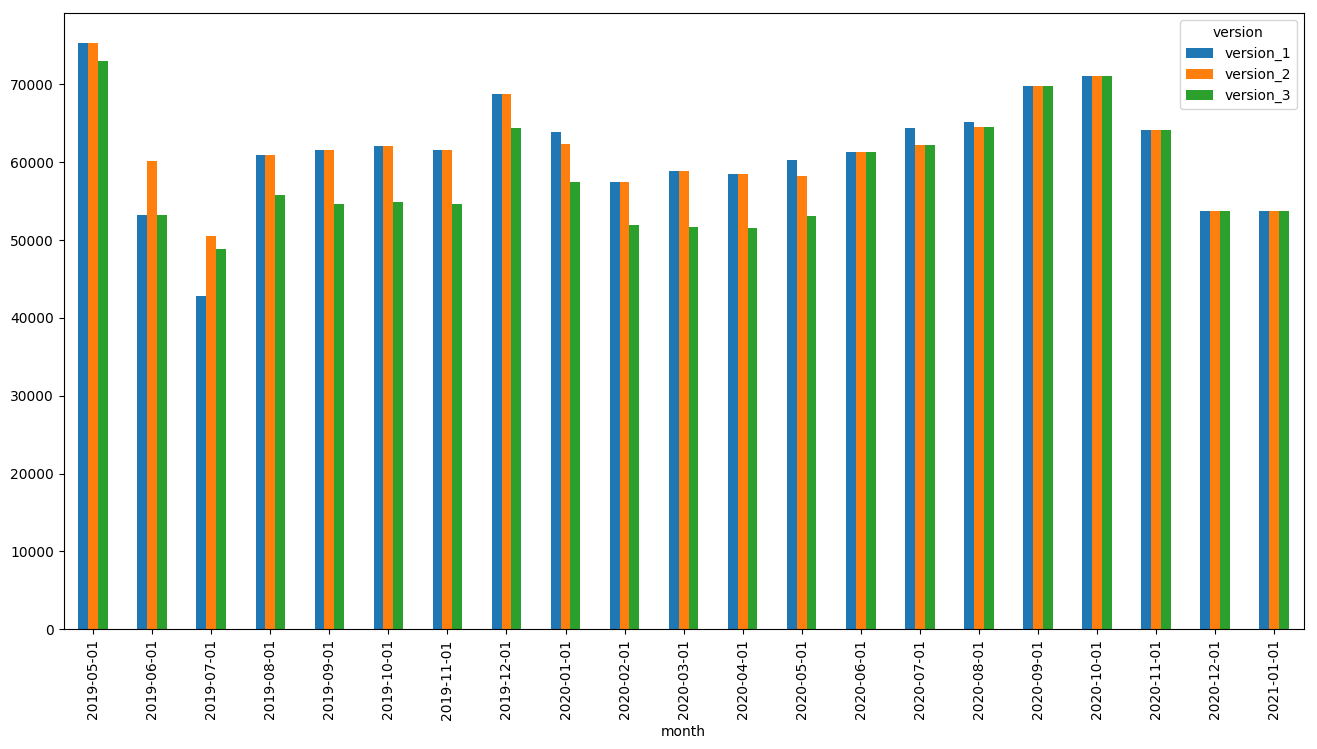

In [20]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
df.pivot(index='month', columns='version', values='total_salary').plot(kind='bar',figsize=(16,8))
plt.show()

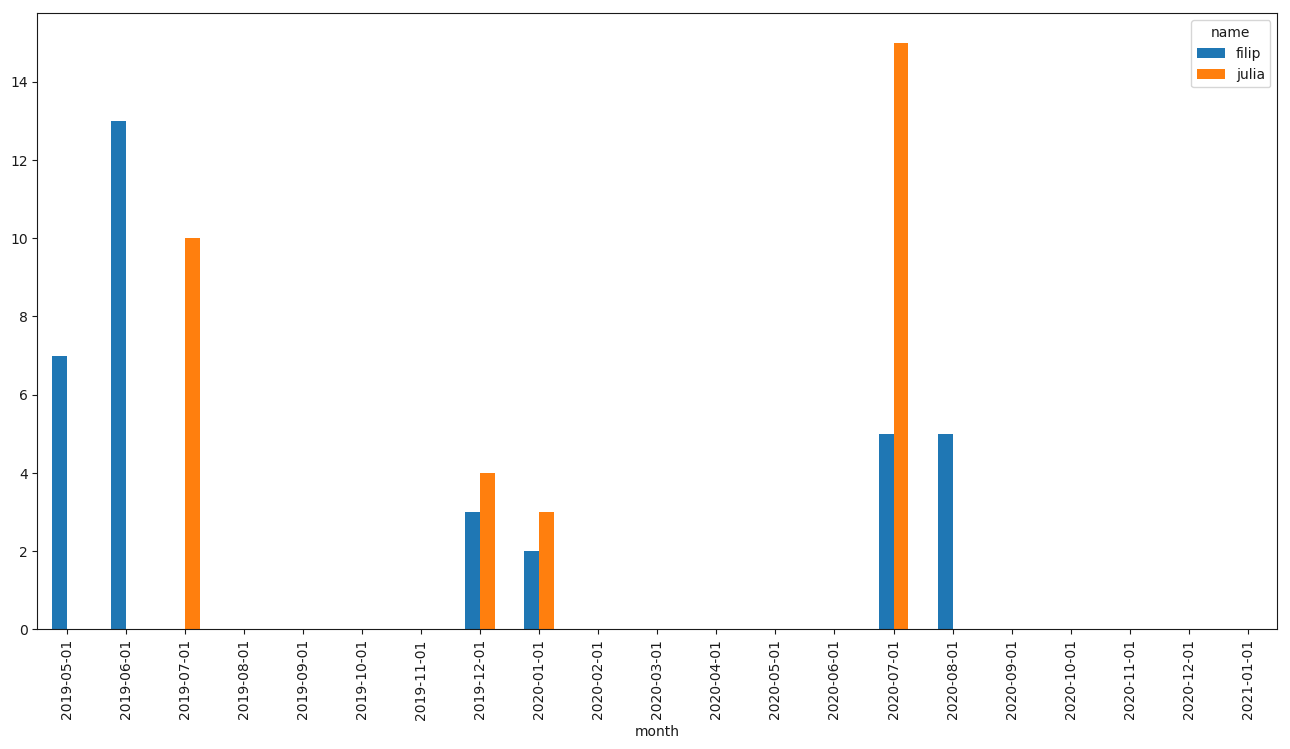

In [351]:
calc_all("input_3.csv").reset_index().pivot('month','name','num_effective_vacation_days').plot(kind='bar',figsize=(16,8))
plt.show()

In [27]:
output_df = output_df[output_df['name']=='filip']

In [30]:
output_df.month = output_df.month.apply(lambda x: str(x))

In [238]:

#figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')

df3#.pivot('month','name','num_not_work_days').plot(kind='bar')

#plt.show()

,num_effective_parent_days,num_not_work,num_vacation_days,num_work_bonus_days,salary_from_work,total_salary,version
month,,,,,,,
2019-05-01,1.428571,8.428571,7.0,10.0,63345.205479,66813.873582,version_3
2019-06-01,11.285714,24.285714,13.0,30.0,32334.246575,48215.670060,version_3
2019-07-01,34.000000,44.000000,10.0,17.0,14026.849315,48833.640001,version_3
2019-08-01,21.142857,21.142857,0.0,31.0,29572.602740,51562.417222,version_3
2019-09-01,4.285714,4.285714,0.0,30.0,42000.000000,48613.404306,version_3
2019-10-01,4.428571,4.428571,0.0,31.0,42000.000000,48833.851117,version_3
2019-11-01,4.285714,4.285714,0.0,30.0,42000.000000,48613.404306,version_3
2019-12-01,2.714286,9.714286,7.0,10.0,53935.890411,58272.208298,version_3
2020-01-01,9.428571,14.428571,5.0,0.0,43185.205479,52213.872917,version_3


In [25]:
output_filip = pd_output[pd_output['name'] == 'filip']
tot_vacation_days = output_filip['num_vacation_days'].sum()
tot_parent_days = output_filip['num_total_parent_days'].sum()


NameError: name 'pd_output' is not defined

In [27]:
plt.plot(output_filip['month'])

NameError: name 'plt' is not defined